In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Data Science Internship/IMDb India Movies/IMDb Movies India.csv', encoding='ISO-8859-1')


In [ ]:
df.head()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [ ]:
df.shape

(15509, 10)

In [ ]:
df.isnull().sum()


,0
Name,0
Year,528
Duration,8269
Genre,1877
Rating,7590
Votes,7589
Director,525
Actor 1,1617
Actor 2,2384
Actor 3,3144


In [ ]:
df.duplicated().sum()

6

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Year'] = df['Year'].str.replace(r'\(|\)', '', regex=True).astype(int)
df['Duration'] = pd.to_numeric(df['Duration'].str.replace(' min', ''))
df['Votes'] = pd.to_numeric(df['Votes'].str.replace(',', ''))

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   int64  
 2   Duration  5659 non-null   int64  
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   int64  
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 486.3+ KB


In [ ]:
top_directors = df['Director'].value_counts()
top_directors

,count
Director,
David Dhawan,41
Mahesh Bhatt,39
Ram Gopal Varma,33
Hrishikesh Mukherjee,33
Shakti Samanta,33
...,...
Sriram Raja,1
Randeep Jha,1
Vicky Bhardwaj,1


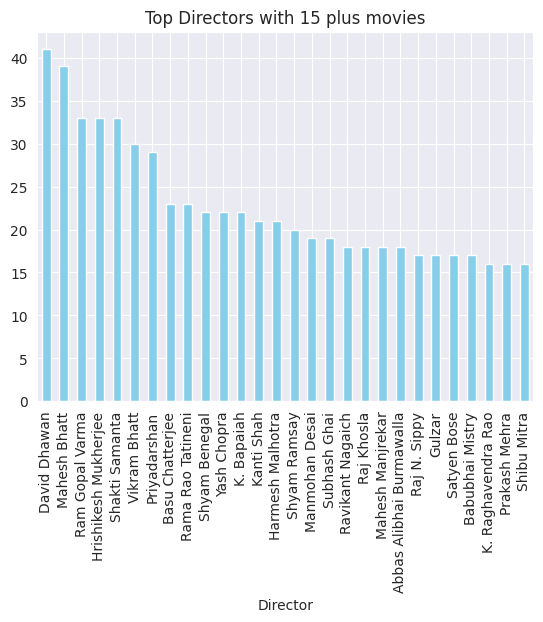

In [ ]:
top_directors = df['Director'].value_counts()
top_directors = top_directors[top_directors > 15]
top_directors.plot(kind='bar', color='skyblue')
plt.title('Top Directors with 15 plus movies')
plt.show()

In [ ]:
top_genres = df['Genre'].value_counts(ascending=False).head(10)
top_genres

,count
Genre,
Drama,844
"Drama, Romance",332
"Action, Crime, Drama",329
"Action, Drama",206
"Comedy, Drama",205
"Comedy, Drama, Romance",188
Comedy,187
Action,170
"Drama, Family",160


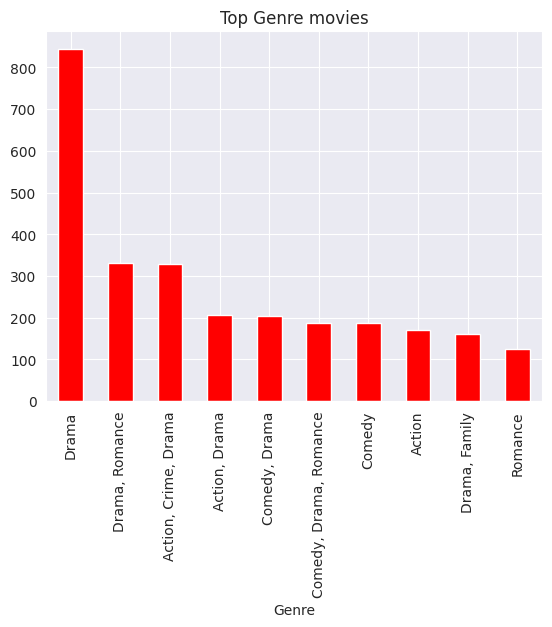

In [ ]:
top_genres.plot(kind='bar', color='red')
plt.title('Top Genre movies')
plt.show()

In [ ]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']])
top_50_actors = actors.value_counts().head(50)
top_50_actors


,count
Mithun Chakraborty,160
Amitabh Bachchan,148
Dharmendra,146
Ashok Kumar,124
Akshay Kumar,120
Shashi Kapoor,117
Jeetendra,116
Sanjay Dutt,101
Rekha,92
Ajay Devgn,92


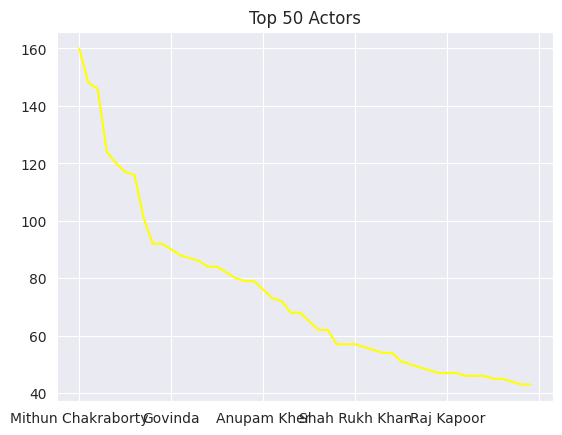

In [ ]:
top_50_actors.plot(kind='line', color='yellow')
plt.title('Top 50 Actors')
plt.show()

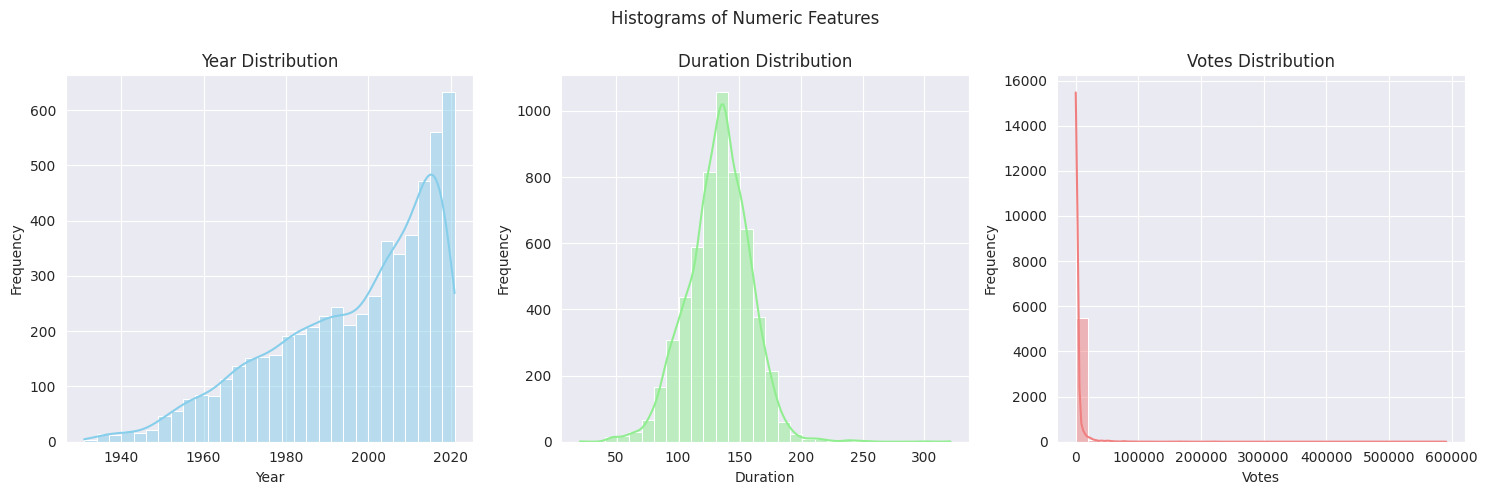

In [ ]:
sns.set_style("darkgrid")

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

sns.histplot(df['Year'], bins=30, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Year Distribution')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Frequency')

sns.histplot(df['Duration'], bins=30, kde=True, ax=axes[1], color='lightgreen')
axes[1].set_title('Duration Distribution')
axes[1].set_xlabel('Duration')
axes[1].set_ylabel('Frequency')

sns.histplot(df['Votes'], bins=30, kde=True, ax=axes[2], color='lightcoral')
axes[2].set_title('Votes Distribution')
axes[2].set_xlabel('Votes')
axes[2].set_ylabel('Frequency')


plt.suptitle('Histograms of Numeric Features')


plt.tight_layout()
plt.subplots_adjust(top=0.85)


plt.show()


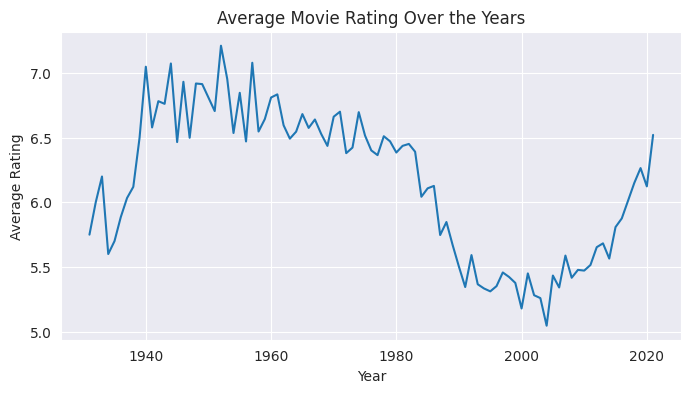

In [ ]:
avg_rating_per_year = df.groupby('Year')['Rating'].mean().reset_index()
avg_rating_per_year.columns = ['Year', 'Average Rating']
plt.figure(figsize=(8, 4))
plt.plot(avg_rating_per_year['Year'], avg_rating_per_year['Average Rating'], linestyle='-')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.title('Average Movie Rating Over the Years')
plt.grid(True)
plt.show()

In [ ]:
low_rating_movie =df[df['Rating'] < 2]
low_rating_movie.value_counts()

,,,,,,,,,,count
Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,
Chatur Singh Two Star,2011,150,"Action, Adventure, Comedy",1.7,624,Ajay Chandhok,Sanjay Dutt,Ameesha Patel,Anupam Kher,1
Desh Drohi,2008,140,"Action, Thriller",1.4,3899,Jagdish A. Sharma,Kamal Rashid Khan,Gracy Singh,Hrishitaa Bhatt,1
Time to Dance,2021,113,"Musical, Romance",1.8,730,Stanley D'Costa,Sooraj Pancholi,Isabelle Kaif,Waluscha De Sousa,1
Tera Intezaar,2017,108,"Romance, Thriller",1.8,262,Raajeev Walia,Arbaaz Khan,Sunny Leone,Bhani Singh,1
Super Model,2013,83,"Drama, Mystery, Romance",1.9,180,Navin Batra,Ashmit Patel,Veena Malik,Sana Oberoi,1
Sadak 2,2020,133,"Action, Drama",1.1,67785,Mahesh Bhatt,Alia Bhatt,Priyanka Bose,Sanjay Dutt,1
Ram Gopal Varma Ki Aag,2007,171,"Action, Adventure, Comedy",1.7,6655,Ram Gopal Varma,Amitabh Bachchan,Mohanlal,Ajay Devgn,1
Radhe,2021,135,"Action, Crime, Thriller",1.8,162455,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda,1
Race 3,2018,160,"Action, Crime, Thriller",1.9,42457,Remo D'Souza,Anil Kapoor,Salman Khan,Bobby Deol,1


In [ ]:
rating_counts = low_rating_movie.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
5,1.9,5
4,1.8,4
3,1.7,5
2,1.6,2
1,1.4,1
0,1.1,1


In [ ]:
high_rating_movie =df[df['Rating'] >7.5]
high_rating_movie.value_counts()

,,,,,,,,,,count
Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,
1971,2007,136,"Action, Drama, War",8.1,1892,Amrit Sagar,Manoj Bajpayee,Ravi Kishan,Deepak Dobriyal,1
Pareeksha,2020,120,Drama,8.1,2921,Prakash Jha,Adil Hussain,Priyanka Bose,Shourya Deep,1
Padosan,1968,157,"Comedy, Musical, Romance",8.1,6443,Jyoti Swaroop,Sunil Dutt,Saira Banu,Mehmood,1
Paheli,1977,131,"Drama, Family",7.6,33,Prashant Nanda,Satyajeet,Nameeta Chandra,Abka Chuliya,1
Palkon Ki Chhaon Mein,1977,127,"Drama, Romance",7.6,67,Meraj,Rajesh Khanna,Hema Malini,Asrani,1
...,...,...,...,...,...,...,...,...,...,...
Ghayal,1990,163,"Action, Crime, Drama",7.6,4114,Rajkumar Santoshi,Sunny Deol,Amrish Puri,Meenakshi Sheshadri,1
Ghar Ghar Ki Kahani,1970,120,"Drama, Family",7.6,67,T. Prakash Rao,Balraj Sahni,Nirupa Roy,Bharathi,1
Gauru: Journey of Courage,2016,124,Family,8.8,85,Ramkishan Choyal,Jahangir Khan,Vedshree Rao,Ila Arun,1


In [ ]:
rating_counts = high_rating_movie.groupby('Rating')['Name'].count().reset_index()
rating_counts.columns = ['Rating', 'Number of Movies']
rating_counts = rating_counts.sort_values(by='Rating', ascending=False)
rating_counts

,Rating,Number of Movies
20,10.0,1
19,9.7,1
18,9.4,3
17,9.3,7
16,9.2,2
15,9.1,4
14,9.0,5
13,8.9,5
12,8.8,6
11,8.7,8


In [ ]:
top_movie = df.sort_values(by='Rating', ascending=False).iloc[0]
top_movie

,8339
Name,Love Qubool Hai
Year,2020
Duration,94
Genre,"Drama, Romance"
Rating,10.0
Votes,5
Director,Saif Ali Sayeed
Actor 1,Ahaan Jha
Actor 2,Mahesh Narayan
Actor 3,Rajasree Rajakumari


In [ ]:
df['Year'] = pd.to_numeric(df['Year']).astype('Int64')
df['Votes'] = pd.to_numeric(df['Votes']).astype('Int64')
df['Duration'] = pd.to_numeric(df['Duration']).astype('Int64')

In [ ]:
df.dtypes

,0
Name,object
Year,Int64
Duration,Int64
Genre,object
Rating,float64
Votes,Int64
Director,object
Actor 1,object
Actor 2,object
Actor 3,object


<Axes: >

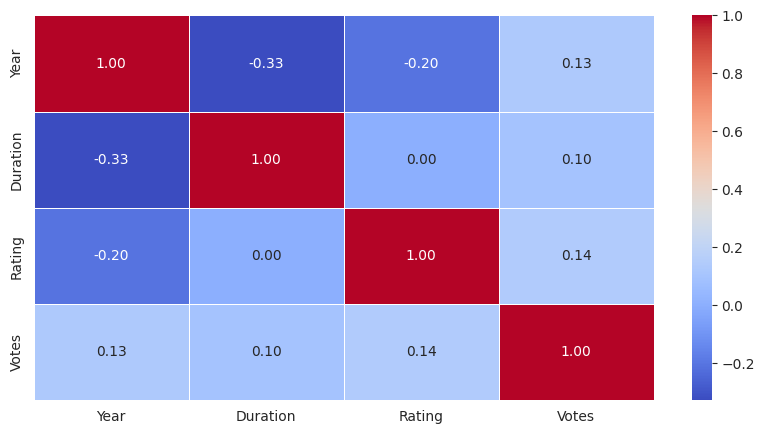

In [ ]:
new_df=  df.drop(columns=['Name','Actor 1','Actor 2','Actor 3','Director','Genre'])
corr=new_df.corr()
plt.figure(figsize=(10,5))

sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidth=0.5)

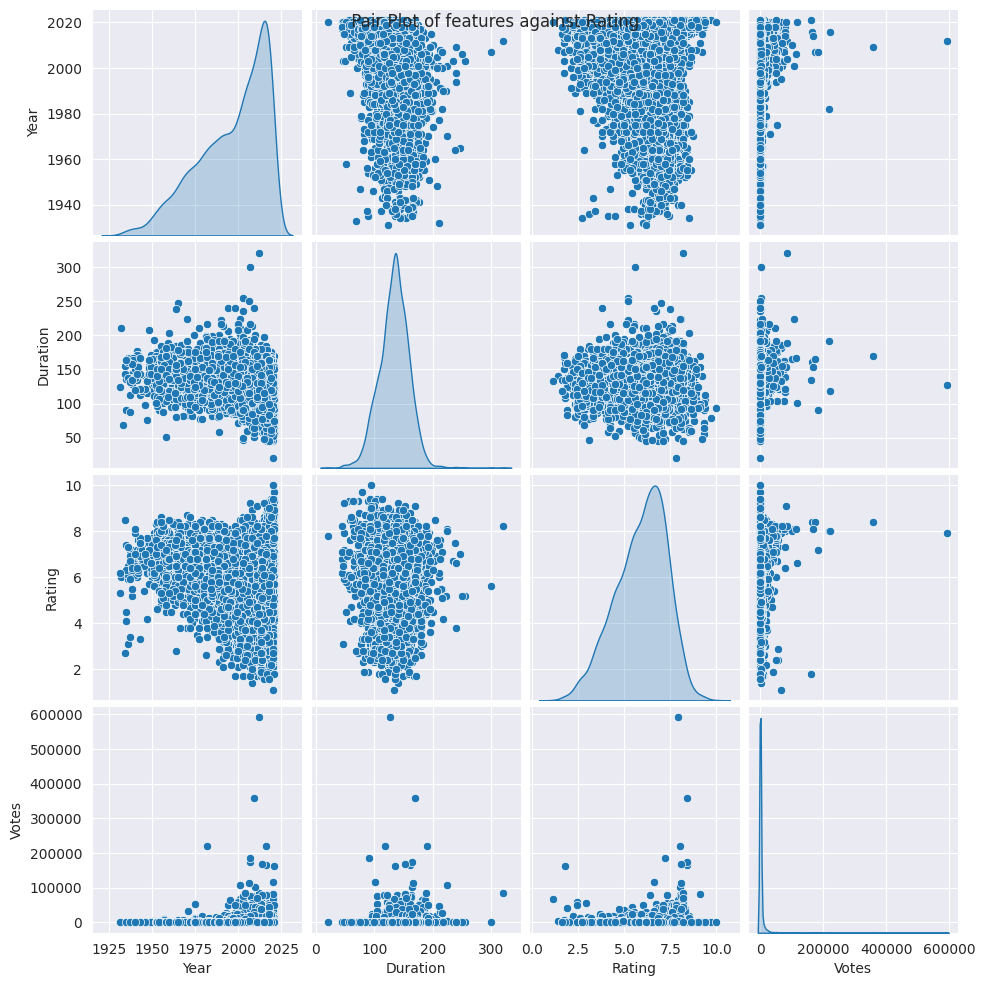

In [ ]:
sns.pairplot(new_df,diag_kind='kde')
plt.suptitle(' Pair Plot of features against Rating')
plt.show()

In [ ]:
df1 = df.drop('Name', axis =1)
df1

,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani


In [ ]:
columns = ['Genre', 'Director', 'Actor 1', 'Actor 2', 'Actor 3']

for column in columns:
    df1[f'{column}_Average_Rating'] = df1.groupby(column)['Rating'].transform('mean')

df1


,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Genre_Average_Rating,Director_Average_Rating,Actor 1_Average_Rating,Actor 2_Average_Rating,Actor 3_Average_Rating
1,2019,109,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,6.415521,7.000000,6.850000,7.000000,7.000000
3,2019,110,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,5.716822,4.400000,5.420000,4.400000,4.450000
5,1997,147,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,6.242222,5.313333,4.788889,5.786667,5.872727
6,2005,142,"Drama, Romance, War",7.4,1086,Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,6.820000,7.383333,5.435000,6.933333,6.500000
8,2012,82,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,5.477778,5.600000,5.600000,5.883333,5.600000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15493,2015,115,Drama,6.1,408,Mozez Singh,Vicky Kaushal,Sarah Jane Dias,Raaghavv Chanana,6.415521,6.100000,6.725000,6.100000,5.850000
15494,2001,153,"Biography, Drama, History",6.2,1496,Shyam Benegal,Karisma Kapoor,Rekha,Manoj Bajpayee,6.950000,7.250000,4.157143,5.823077,5.954545
15503,1989,125,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi,Jayamalini,Rajinikanth,5.743465,6.270000,6.307692,5.800000,6.050000
15505,1999,129,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar,Twinkle Khanna,Aruna Irani,5.516505,5.225000,5.481707,4.640000,5.737500


In [ ]:
from sklearn.model_selection import train_test_split

X= df1[['Year','Votes','Duration','Genre_Average_Rating','Director_Average_Rating','Actor 1_Average_Rating','Actor 2_Average_Rating','Actor 3_Average_Rating']]
y=df1['Rating']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2)

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((4527, 8), (1132, 8), (4527,), (1132,))

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import train_test_split


linear_reg = LinearRegression()
decision_tree = DecisionTreeRegressor(random_state=42)
random_forest = RandomForestRegressor(random_state=42, n_estimators=100)


models = {'Linear Regression': linear_reg,
          'Decision Tree': decision_tree,
          'Random Forest': random_forest}

results = {}

for model_name, model in models.items():

    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results[model_name] = {'MSE': mse, 'MAE': mae, 'R2 Score': r2}
    print(f"{model_name}:")
    print(f"  Mean Squared Error (MSE): {mse:.2f}")
    print(f"  Mean Absolute Error (MAE): {mae:.2f}")
    print(f"  R^2 Score: {r2:.2f}\n")


Linear Regression:
  Mean Squared Error (MSE): 0.42
  Mean Absolute Error (MAE): 0.48
  R^2 Score: 0.78

Decision Tree:
  Mean Squared Error (MSE): 0.66
  Mean Absolute Error (MAE): 0.54
  R^2 Score: 0.65

Random Forest:
  Mean Squared Error (MSE): 0.33
  Mean Absolute Error (MAE): 0.39
  R^2 Score: 0.83



From this we found that Random Forest is best-performing model. It minimizes both MSE and MAE, while explaining 80% of the variance, showcasing its robustness as an ensemble method.
